#### Case : Isobaric evaporation of liquid hydrogen in a 50 $m^3$ spherical tank experiments.

This notebook sets up the isobaric evaporation of liquid hydrogen ($LH_2$) in a 50 $m^3$ storage tank. 

In [55]:
# Ensure that python finds the submodules
import sys
sys.path.append("..") # Adds higher directory to python modules path.

# Scientific computing
import numpy as np

# Visualisation
import matplotlib.pyplot as plt

## Module imports
# Import the storage tank Class
from cryoevap.storage_tanks import Tank

# Import Cryogen class
from cryoevap.cryogens import Cryogen

from scipy.integrate import simpson

#### Setup tank and cryogen properties

In [56]:
# LNG tank properties
Q_roof = 0 # Roof heat ingress / W
d_i = 3 # Internal diameter / m
d_o = d_i + 2.08e-3   # External diameter / m
T_air = 350 # Temperature of the environment K

# Set overall heat transfer coefficient through the walls for liquid and vapour
U_L = 0.01063 # W/m2/K
U_V = 0.01063 # W/m2/K
eta = 0.95

# Specify heat transfer rate at the bottom to prevent ground heating
Q_b = 0 # W, 
Q_roof = 0

# Spherical tank volume
V_tank      = 50 # m^3
Lenght_tank = 7.07 # m, length of the tank

# Initial liquid filling / Dimensionless
LF = 0.05

# Specify tank operating pressure
P = 117e3 # Pa

Geo_v1 = "horizontal"

Geo_l1 = "horizontal"

# Initialize large-scale tank
hor_tank = Tank(d_i, d_o, V_tank, Geo_v1, Geo_l1, LF, Lenght_tank)
hor_tank.set_HeatTransProps(U_L, U_V, T_air, Q_b, Q_roof, eta)
# Initialise cryogen
hydrogen1 = Cryogen(name = "hydrogen")
hydrogen1.set_coolprops(P)


# Set cryogen
hor_tank.cryogen = hydrogen1

# Calculate initial evaporation rate
# print("The initial evaporation rate of " + hydrogen1.name + " is %.1e kg/h" % (hor_tank.b_l_dot * 3600))

Calculate initial evaporation rate and transient period

In [57]:
# Calculate initial evaporation rate
print("The initial evaporation rate of " + hydrogen1.name + " is %.1e kg/h" % (hor_tank.b_l_dot * 3600))

# Estimate transient period duration
print("Transient period = %.3f s " % hor_tank.tau)

# Minimum number of hours to achieve steady state 
tau_h1 = (np.floor(hor_tank.tau / 3600) + 1)

# Print simulation time of the transient period for short-term storage
print("Simulation time: %.0i h" % tau_h1 )

# Calculate boil-off rate
BOR1 = (hor_tank.b_l_dot * 24 * 3600) / (hor_tank.V * hor_tank.LF * hor_tank.cryogen.rho_L)
print("BOR = %.3f %%" % (BOR1 * 100))

The initial evaporation rate of hydrogen is 2.2e+00 kg/h
Transient period = 82309.267 s 
Simulation time: 23 h
BOR = 29.907 %


#### Simulation setup and execution

In [58]:
# Define vertical spacing
dz = 0.0075*2

# Calculate number of nodes
n_z = 1 + int(np.round(hor_tank.l_V/dz, 0))

# Define dimensionless computational grid
hor_tank.z_grid = np.linspace(0, 1, n_z)

# Insulated roof
hor_tank.U_roof = 0

# Define evaporation time as twice as the transient period
evap_time = 3600 *tau_h1*2
#evap_time = 3600*24

# Time step to record data, relevant for plotting integrated quantities
# such as the vapour to liquid heat transfer rate, Q_VL
hor_tank.time_interval = 60

# Time step to plot each vapour temperature profile
hor_tank.plot_interval = evap_time/6

# Simulate the evaporation
hor_tank.evaporate(evap_time)

#### Visualisation of results

#### Vapour temperature

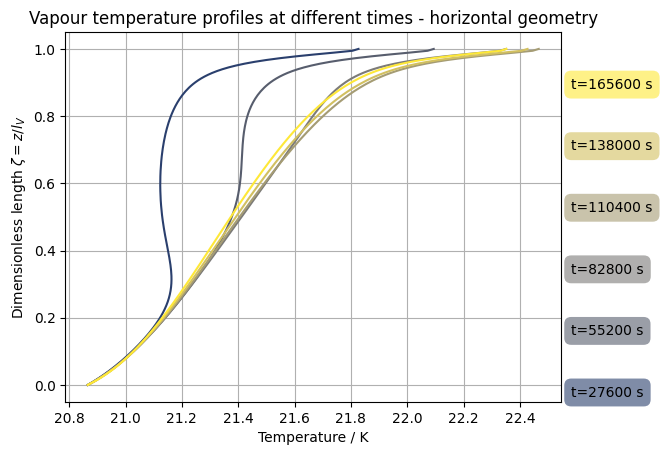

In [59]:
# Visualise the plot
hor_tank.plot_tv()

Visualise liquid and vapour heat ingresses, $\dot{Q}_{\text{L}}$ and  $\dot{Q}_{\text{V}}$.

The plot also shows the vapour to liquid heat ingress, $\dot{Q}_{VL}$, and  the partition of the vapour heat ingress that is transferred to the interface by the wall directly, $\dot{Q}_{\text{V,w}}$

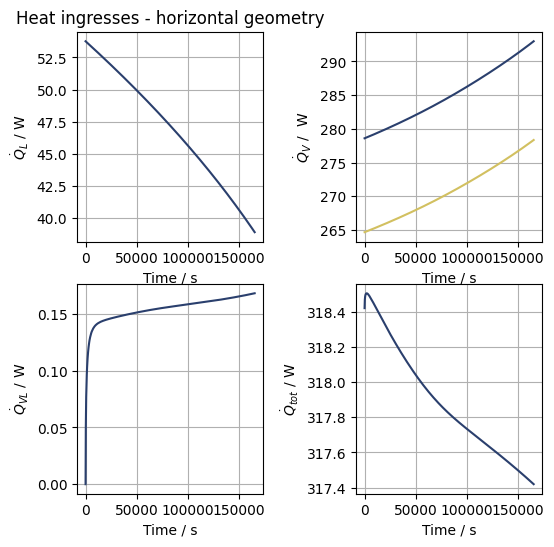

In [60]:
# Provide optional parameter unit to
# accommodate the scale of the experiment
hor_tank.plot_Q(unit="W")

#### Plot liquid volume

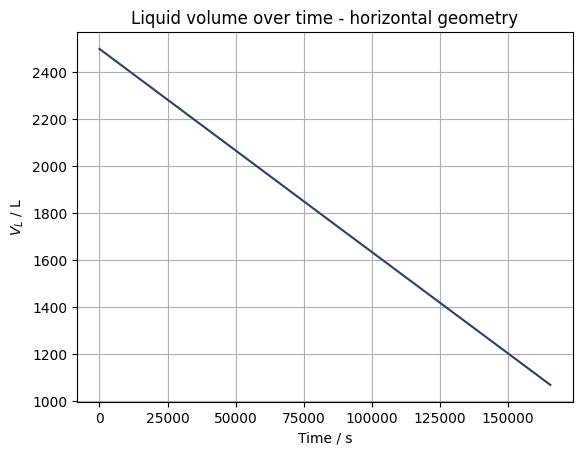

In [61]:
# Provide optional parameter unit to
# accommodate the scale of the experiment
hor_tank.plot_V_L(unit="L")

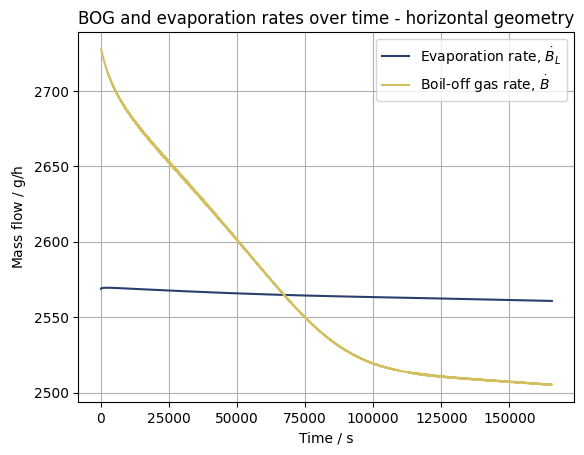

In [62]:
# Provide optional parameter unit to
# accommodate the scale of the experiment
hor_tank.plot_BOG(unit='g/h')

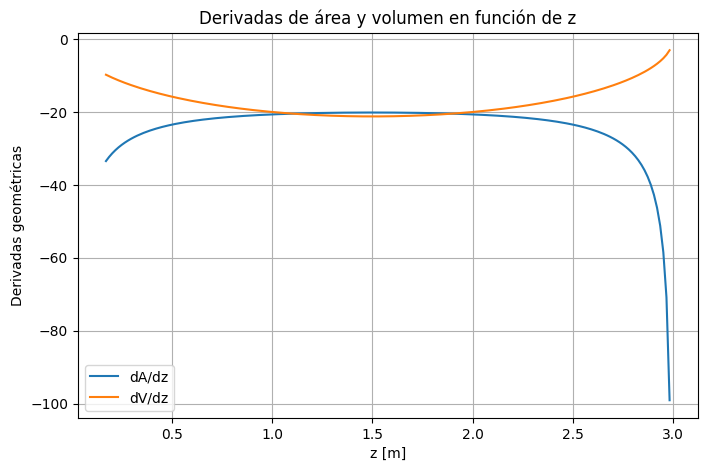

In [63]:
plt.figure(figsize=(8,5))
plt.plot(hor_tank.z_local, hor_tank.dA_dz, label='dA/dz')
plt.plot(hor_tank.z_local, hor_tank.dV_dz, label='dV/dz')
plt.xlabel('z [m]')
plt.ylabel('Derivadas geométricas')
plt.legend()
plt.grid(True)
plt.title('Derivadas de área y volumen en función de z')
plt.show()